<a href="https://colab.research.google.com/github/ritammondal2004/rock-paper-scissor-gui/blob/main/game_notebook_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🪨📄✂️ **Rock-Paper-Scissors Game (Tkinter GUI)**

This notebook provides a **code walkthrough** and explanation of a Python GUI-based **Rock-Paper-Scissors game** built using `Tkinter`, `PIL`, `pygame`, and sound/image assets.

> ⚠️ **Note**: This notebook is for **understanding only**.  
Tkinter GUI elements won't run inside Colab or Jupyter due to the lack of a graphical interface.  
Please run the actual `.py` file locally (in VS Code or another IDE) to play the game.

---

### 📝 **Problem Statement**

> **Design and develop an interactive Rock-Paper-Scissors game using Python with a graphical user interface (GUI).**  
The game should allow the user to:
- Choose a number of rounds to play (1 to 5)
- Select between Rock, Paper, or Scissor against a bot
- Display results with expressive images and sound effects
- Show win

___

### 🎯 **Objective**

- Demonstrate use of GUI libraries (`Tkinter`)
- Implement game logic and score tracking
- Add user experience features like sound (`pygame`) and animations (`PIL`)
- Maintain clean project structure using folders like `images/`, `sounds/`

---

In [ ]:
from tkinter import Tk, Canvas, Label, Button, Frame, Toplevel
from PIL import ImageTk, Image
import random, pygame, time
from functools import partial
import threading

## create **main window** object

In [ ]:
root = Tk()

# Title of window
root.title('Rock Paper Scissor')

# Size of window
root.geometry('1000x680')
root.configure(bg="white")

### 🎮 **Creating GUI Frames and Background Layout**

To organize the interface, we create **two main frames**:

- `start_frame`: Shown at the beginning, allows the user to choose how many rounds to play
- `game_frame`: Displays the actual game interface during gameplay

---

###  Frame Setup

- Both frames are set to **1000×680 pixels** and stacked using `.grid(...)`
- The **start_frame** contains a full-size background image (`start_img.png`) using a `Label`
- The **game_frame** includes a `Canvas` widget for placing hands, images, score text, etc.

---

###  Summary of Code:
- `Frame(...)` is used to define and stack the layout
- `Label(..., image=...)` places the background image
- `Canvas(...)` acts as the visual drawing board for gameplay

> This modular approach allows smooth transitions between the start screen and the game screen.



In [ ]:
#Create Two Frames
start_frame = Frame(root, width=1000, height=680)
start_frame.grid(row=0, column=0, sticky="news")

bg_img = Image.open("images/start_img.png").resize((1000, 680))
bg_photo = ImageTk.PhotoImage(bg_img)
bg_label = Label(start_frame, image=bg_photo)
bg_label.image = bg_photo
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

game_frame = Frame(root, width=1000, height=680, bg='white')

canvas = Canvas(game_frame, width=1000, height=680, bg='white')
canvas.grid(row=0, column=0)
canvas.configure(bg="white")

### **Sound setup using pygame**

The game uses `pygame.mixer` to play sound effects for user actions and game events. To avoid freezing the GUI during playback, all sounds are played on separate threads using Python's `threading` module.

Functions defined:

- `play_sound(path, vol=1)`: Plays a sound once at the given volume.
- `loop_sound(path, loop_count=-1, vol=0.5)`: Loops a sound indefinitely or for a fixed count.
- `play_clip(path, start_sec, end_sec, vol=0.9)`: Plays a specific portion of a sound between given start and end times.

The `pygame.mixer.init()` line initializes the sound system.


In [ ]:
# ------------ Initialize pygame mixer for sound effects--------------
pygame.mixer.init()
def play_sound(path, vol = 1):
    def inner():
        pygame.mixer.music.load(path)
        pygame.mixer.music.set_volume(vol)  # Volume 0.0 to 1.0
        pygame.mixer.music.play()  #(loops: int = 0, start: float = 0, fade_ms: int = 0) -> None
    threading.Thread(target=inner, daemon=True).start()


def loop_sound(path, loop_count=-1,vol=0.5):
    def inner():
        pygame.mixer.music.load(path)
        pygame.mixer.music.set_volume(vol)
        pygame.mixer.music.play(loop_count)
    threading.Thread(target=inner, daemon=True).start()


def play_clip(path, start_sec, end_sec, vol=0.9):
    def inner():
        pygame.mixer.music.load(path)
        pygame.mixer.music.play(start=start_sec)
        pygame.mixer.music.set_volume(vol)
        time.sleep(end_sec - start_sec)
        pygame.mixer.music.stop()
    threading.Thread(target=inner, daemon=True).start()

### **Frame switching and start screen setup**

Both `start_frame` and `game_frame` are added to the grid so they can be raised to the top when needed. Only one frame is visible at a time.


- `welcome_label`: Displays the title on the start screen.
- `round_label`: Asks the user to select the number of rounds.

This setup allows switching between the welcome screen and the main game interface.


In [ ]:
# start the frames in the grid
for frame in (start_frame, game_frame):
    frame.grid(row=0, column=0, sticky='news')

welcome_label = Label(start_frame, text='🎮 Welcome to Rock Paper Scissors 🎮', font=("Arial", 24, "bold"), bg='white')
welcome_label.place(x=180, y=30)

round_label = Label(start_frame, text='Select Rounds:', font=("Arial", 18), bg='white')
round_label.place(x=400, y=100)



- `show_frame(f)`: Brings the specified frame (`f`) to the front using `.tkraise()`.

In [ ]:
# Function to raise a frame to the top
def show_frame(f):
    f.tkraise()

### **Round selection logic**

The `select_rounds(n)` function initializes game state variables based on the selected number of rounds and switches to the game screen. It also plays a click sound for user feedback.

- `total_rounds`, `current_round`, `score_p`, and `score_b` are reset at the start.
- A set of 10 buttons (1 to 10 rounds) are dynamically created and placed in two rows.
- Button colors alternate for better visual distinction.
- On click, the corresponding round count is passed to `select_rounds()` using `partial()`.


In [ ]:
def select_rounds(n):
    play_sound("sounds/round_click.wav")

    global total_rounds, current_round, game_active, score_p, score_b
    total_rounds = n
    current_round = 0
    score_p = 0
    score_b = 0
    game_active = True
    show_frame(game_frame)  #  switch to gameplay screen

for i in range(1, 11):
    Button(start_frame, text=f"{i} Round{'s' if i > 1 else ''}", font=("Arial", 14),
           width=12, bg="#30e30c" if i%2==0 else '#df2443' , fg="black", command=partial(select_rounds, i))\
           .place(x=160 + (i-1) *150 if i<=5 else 160 + (i-6)*150, y=150 if i<=5 else 197 )

### **Player and bot labels**

Basic labels are added to the `game_frame` to indicate player and bot positions:

- A `"Player(You)"` label is shown on the left.
- A `"Vs"` label is placed at the center to separate the two sides.
- A bot icon image (`bot_icon.jpg`) is displayed on the right to represent the computer opponent.

The image is loaded using `PIL`, resized, and assigned to a `Label` widget.


In [ ]:
# Creating labels
l1 = Label(game_frame, text='Player(You)', font=('Arial', 20), bg='#612685', fg='white')
l1.place(x=80, y=30)

bot_icon = Image.open("images/bot_icon.jpg").resize((100, 80))
bot_icon = ImageTk.PhotoImage(bot_icon)
# Place bot image
l2 = Label(game_frame, image=bot_icon, bg='white')
l2.image = bot_icon  # Keep a reference to the image to prevent garbage collection
l2.place(x=710, y=20)

l3 = Label(game_frame, text='Vs', font=('Arial', 25), bg='#2eaf14', fg='white')
l3.place(x=470, y=230)

### **Image loading and preparation**

Various images are loaded and resized to represent different game states and player actions. `PIL.Image` is used for loading and manipulating images, while `ImageTk.PhotoImage` converts them for use in Tkinter.

- **Default hands**: `default.jpg` is shown before the game begins.
- **Move images**: Each move (rock, paper, scissor) has a base image and a flipped version for the bot’s side.
- **Expression variants**:
  - Angry (when winning)
  - Fear (when losing)
- **Selection panel**: A visual image (`selection.jpg`) is shown below each side as a background.
- **Game result images**: Visuals for win (`YouWin.jpg`), lose (`YouLose.jpg`), and draw (`YouTie.jpg`) are prepared to display after the final round.

All images are resized to fit the canvas and flipped horizontally using `transpose()` for bot perspective.


In [ ]:
# load default image and flip it or transpose
img_p = Image.open('images/default.jpg')
img_p = img_p.resize((300, 300))

img_b = img_p.transpose(Image.FLIP_LEFT_RIGHT)

# Loading images to put on canvas
img_p = ImageTk.PhotoImage(img_p)
img_b = ImageTk.PhotoImage(img_b)

## ----------------rocks-----------------------
Rock_p = Image.open('images/rock.jpg').resize((300, 300))  # Load rock image
Rock_b = Rock_p.transpose(Image.FLIP_LEFT_RIGHT)  # Flip for bot image
# put on canvas
Rock_p = ImageTk.PhotoImage(Rock_p)
Rock_b = ImageTk.PhotoImage(Rock_b)

# load rock angry image
RockAngry_p = Image.open('images/RockAngry.webp')
RockAngry_p = RockAngry_p.resize((300, 300))
RockAngry_b = RockAngry_p.transpose(Image.FLIP_LEFT_RIGHT) # for bot
#put on canvas
RockAngry_p = ImageTk.PhotoImage(RockAngry_p)
RockAngry_b = ImageTk.PhotoImage(RockAngry_b)

# Load rock fear image
RockFear_p = Image.open('images/RockFear.png').resize((300, 300))
RockFear_b = RockFear_p.transpose(Image.FLIP_LEFT_RIGHT)  # for bot rock hand
# put on canvas
RockFear_p = ImageTk.PhotoImage(RockFear_p)
RockFear_b = ImageTk.PhotoImage(RockFear_b)

## -----------------papers---------------------

Paper_p = Image.open('images/Paper.jpg').resize((300, 300))  # Load paper image
Paper_b = Paper_p.transpose(Image.FLIP_LEFT_RIGHT)  # Flip for bot image
# put on canvas
Paper_p = ImageTk.PhotoImage(Paper_p)
Paper_b = ImageTk.PhotoImage(Paper_b)

# load paper angry image
PaperAngry_p = Image.open('images/PaperAngry.jpg').resize((300, 300))
PaperAngry_b = PaperAngry_p.transpose(Image.FLIP_LEFT_RIGHT)  # for bot rock hand
# put on canvas
PaperAngry_p = ImageTk.PhotoImage(PaperAngry_p)
PaperAngry_b = ImageTk.PhotoImage(PaperAngry_b)

# load paper fear image
PaperFear_p = Image.open('images/PaperFear.jpg').resize((300, 300))
PaperFear_b = PaperFear_p.transpose(Image.FLIP_LEFT_RIGHT)  # for bot paper hand
# put on canvas
PaperFear_p = ImageTk.PhotoImage(PaperFear_p)
PaperFear_b = ImageTk.PhotoImage(PaperFear_b)

# -----------------scissors---------------------
Scissor_p = Image.open('images/Scissor.webp').resize((300, 300))  # Load scissor image
Scissor_b = Scissor_p.transpose(Image.FLIP_LEFT_RIGHT)  # Flip for bot image
# put on canvas
Scissor_p = ImageTk.PhotoImage(Scissor_p)
Scissor_b = ImageTk.PhotoImage(Scissor_b)

# load scissor Angry image
ScissorAngry_p = Image.open('images/ScissorAngry.webp').resize((300, 300))
ScissorAngry_b = ScissorAngry_p.transpose(Image.FLIP_LEFT_RIGHT)  # for bot scissor hand
# put on canvas
ScissorAngry_p = ImageTk.PhotoImage(ScissorAngry_p)
ScissorAngry_b = ImageTk.PhotoImage(ScissorAngry_b)

# load scissor fear image
ScissorFear_p = Image.open('images/ScissorFear.png').resize((300, 300))
ScissorFear_b = ScissorFear_p.transpose(Image.FLIP_LEFT_RIGHT)  # for bot scissor hand
# put on canvas
ScissorFear_p = ImageTk.PhotoImage(ScissorFear_p)
ScissorFear_b = ImageTk.PhotoImage(ScissorFear_b)

# selection img
img_s = Image.open('images/selection.jpg').resize((300,110))
img_s = ImageTk.PhotoImage(img_s)

# Put image on canvas on specific coordinate
canvas.create_image(0,470, anchor='nw', image=img_s)
canvas.create_image(620,470, anchor='nw', image=img_s)

# Result images
win_img = Image.open('images/YouWin.jpg').resize((200, 200))
win_img = ImageTk.PhotoImage(win_img)

lose_img = Image.open('images/YouLose.jpg').resize((200, 200))
lose_img = ImageTk.PhotoImage(lose_img)

draw_img = Image.open('images/YouTie.jpg').resize((200, 200))
draw_img = ImageTk.PhotoImage(draw_img)

### **Initial canvas setup**

At the beginning of the game:

- Two default images are placed using `canvas.create_image()` — one for the player (`img_p`) and one for the bot (`img_b`).
- Two empty placeholders (`player_move_id`, `bot_move_id`) are initialized to later show the chosen hand gestures.
- These move images are initially hidden using `itemconfig(..., state='hidden')` and made visible when the game starts.
- `score_p` and `score_b` are initialized to track player and bot scores.
- A canvas text displays the live score at the top center.

This prepares the canvas to visually update with user/bot moves and scores.


In [ ]:
player_img_id = canvas.create_image(0, 100, anchor='nw', image=img_p) # default images
bot_img_id    = canvas.create_image(620, 100, anchor='nw', image=img_b)

# Initialize empty images for moves (to show after player clicks)
player_move_id = canvas.create_image(0, 100, anchor='nw', image=None)
bot_move_id = canvas.create_image(620, 100, anchor='nw', image=None)

# Initially hide move hands
canvas.itemconfig(player_move_id, state='hidden')
canvas.itemconfig(bot_move_id, state='hidden')

score_p = 0  # Player score
score_b = 0  # Bot score
canvas.create_text(490,100, text=f"Score - You: {score_p} | Bot: {score_b}", font=('Arial', 17), fill='black', tags='result')

### Function to show result image based on the game outcome

In [ ]:

def show_result_image(img):
    # Remove any previous result image or text
    canvas.delete('result_img')

    # Display new image at center-bottom
    canvas.create_image(480, 500, image=img, anchor='center', tags='result_img')

### **Reset function**

The `clear()` function resets the game state and visuals:

- Plays a reset/menu sound using `play_sound()`
- Removes any existing result text and image from the canvas
- Resets global values:
  - `score_p`, `score_b`: scores
  - `current_round`: round counter
- Restores the default player and bot hand images
- Hides any move hands that were displayed during the last round

This is used when returning to the main menu or starting a new game.


In [ ]:
# clear function or reset
def clear():
    play_sound("sounds/reset_and_menu.wav", 1.4)

    canvas.delete('result')
    canvas.delete('result_img')

    global score_p, score_b, current_round  # Access global scores
    score_p = 0  # Reset player score
    score_b = 0  # Reset bot score
    current_round = 0  # Reset current round
    canvas.create_text(490,100, text=f"Score - You: {score_p} | Bot: {score_b}", font=('Arial', 17), fill='black', tags='result')

    # Show default hands
    canvas.itemconfig(player_img_id, state='normal')
    canvas.itemconfig(bot_img_id, state='normal')

    # Hide move hands
    canvas.itemconfig(player_move_id, state='hidden')
    canvas.itemconfig(bot_move_id, state='hidden')

### **Final popup on game completion**

The `end_game_popup()` function creates a custom popup window when all rounds are completed.

Features:
- Uses `Toplevel(root)` to open a new child window
- Window is centered on the screen manually using screen and window dimensions
- Displays a message with styling and emojis
- Two buttons:
  - **Play Again**: Resets the game, shows the start screen, and starts background music
  - **Exit**: Plays an exit sound and closes the app after a short delay

UI elements are styled with colors, fonts, and layout using `Label`, `Frame`, and `Button`.

`grab_set()` and `wait_window()` are used to block the main window until the popup is dismissed.


In [ ]:
def end_game_popup():
    popup = Toplevel(root)
    popup.title("🎮 Game Over!🎮")
    popup.geometry("400x250")
    popup.configure(bg="#ffe4e1")  # Light pink background
    popup.resizable(False, False)

    # CENTER THE POPUP
    popup.update_idletasks()
    popup_width = popup.winfo_width()
    popup_height = popup.winfo_height()

    screen_width = popup.winfo_screenwidth()
    screen_height = popup.winfo_screenheight()

    x = int((screen_width / 2) - (popup_width / 2))
    y = int((screen_height / 2) - (popup_height / 2))
    popup.geometry(f"400x250+{x}+{y}")

    # Message with emojis
    msg = Label(popup, text="🏆 Khel khatam bro! 🎉\nDo you want to play again?",
                font=("Arial", 16, "bold"), bg="#ffe4e1", fg="#2d033b", justify='center')
    msg.pack(pady=30)

    # Button frame
    btn_frame = Frame(popup, bg="#ffe4e1")
    btn_frame.pack(pady=10)

    # PLAY AGAIN button
    play_btn = Button(btn_frame, text="🔁 Play Again", font=("Arial", 12, "bold"),
                bg="#4CAF50", fg="white", width=12, command=lambda: [popup.destroy(), clear(), show_frame(start_frame), loop_sound("sounds/welcome.mp3")])
    play_btn.grid(row=0, column=0, padx=20)

    # EXIT button
    exit_btn = Button(btn_frame, text="❌ Exit", font=("Arial", 12, "bold"),
                      bg="#f44336", fg="white", width=12, command=lambda: [play_clip('sounds/Quit.mp3',0,2),popup.after(2020,root.destroy)])
    exit_btn.grid(row=0, column=1, padx=20)

    # Center popup over root window
    popup.transient(root)
    popup.grab_set()
    root.wait_window(popup)

### **Actual Game logic and move handling**

The `game(player)` function implements the full game round logic:

- **Input**: `player` receives `'r'`, `'p'`, or `'s'`.
- **Bot move**: Randomly selected from the same set.
- **Default hands** are hidden, and actual move hands are shown using canvas image updates.
- Each possible match outcome updates the canvas with:
  - Appropriate player and bot gesture images
  - Sound effects using `play_sound()` or `play_clip()`
- **Result evaluation**:
  - "W" for win, "L" for loss, "D" for draw
  - Score is updated accordingly
- **Round tracking**:
  - Round count is incremented
  - Score and current round displayed using `canvas.create_text()`
- Once all rounds are played:
  - Final result image is shown
  - A corresponding sound plays
  - A popup is triggered via `end_game_popup()` after a short delay

This function is the core of the game's round-by-round interaction.


In [ ]:

# game
def game(player):

    global current_round, total_rounds, game_active, score_p, score_b  # Access global variables
    if not game_active:
        return  # Stop further moves if game is over

    canvas.delete('result')  # clear previous result text

    choices = ['r', 'p', 's']  # list of choices for bot
    bot = random.choice(choices) # randomly selecting bot choice

     # Hide default hands
    canvas.itemconfig(player_img_id, state='hidden')
    canvas.itemconfig(bot_img_id, state='hidden')

    # Show move hands
    canvas.itemconfig(player_move_id, state='normal')
    canvas.itemconfig(bot_move_id, state='normal')

    # update player's win image
    if player == 'r' and bot=='s' :
        play_sound("sounds/rocks.mp3",0.8)
        canvas.itemconfig(player_move_id, image=RockAngry_p)  # Player wins with rock
        canvas.itemconfig(bot_move_id, image=ScissorFear_b)  # Bot loses with scissor
    elif player == 'p' and bot=='r':
        play_sound("sounds/paper.mp3")
        canvas.itemconfig(player_move_id, image=PaperAngry_p)  # Player wins with paper
        canvas.itemconfig(bot_move_id, image=RockFear_b)
    elif player == 's' and bot=='p':
        play_clip("sounds/scissor.mp3", 0, 1)
        canvas.itemconfig(player_move_id, image=ScissorAngry_p)  # Player wins with scissor
        canvas.itemconfig(bot_move_id, image=PaperFear_b)  # Bot loses with paper
    # update bot's win image
    elif bot == 'r' and player=='s':
        play_clip("sounds/scissor.mp3", 0, 1)
        canvas.itemconfig(bot_move_id, image=RockAngry_b)  # Bot wins with rock
        canvas.itemconfig(player_move_id, image=ScissorFear_p)  # Player loses with scissor
    elif bot == 'p' and player=='r' :
        play_sound("sounds/rocks.mp3",0.8)
        canvas.itemconfig(bot_move_id, image=PaperAngry_b)  # Bot wins with paper
        canvas.itemconfig(player_move_id, image=RockFear_p)  # Player loses with rock
    elif bot=='s' and player=='p':
        play_sound("sounds/paper.mp3")
        canvas.itemconfig(bot_move_id, image=ScissorAngry_b)  # Bot wins with scissor
        canvas.itemconfig(player_move_id, image=PaperFear_p)  # Player loses with paper
    # match tie cases
    elif bot == 'r' and player=='r':
        play_sound("sounds/rocks.mp3",0.8)
        canvas.itemconfig(player_move_id, image=Rock_p)  # Player ties with rock
        canvas.itemconfig(bot_move_id, image=Rock_b)  # Bot ties with rock
    elif bot == 's' and player=='s':
        play_clip("sounds/scissor.mp3", 0, 1)
        canvas.itemconfig(player_move_id, image=Scissor_p)  # Player ties with scissor
        canvas.itemconfig(bot_move_id, image=Scissor_b)  # Bot ties with scissor
    else:
        play_sound("sounds/paper.mp3")
        canvas.itemconfig(player_move_id, image=Paper_p)
        canvas.itemconfig(bot_move_id, image=Paper_b)  # Player ties with paper

    # Determine result with logic
    if player == bot:
        result = "D"
    elif (player == 'r' and bot == 's') or (player == 'p' and bot == 'r') or (player == 's' and bot == 'p'):
        result = "W"
        score_p += 1
    else:
        result = "L"
        score_b += 1

    current_round += 1
    canvas.create_text(490,100, text=f"Score - You: {score_p} | Bot: {score_b}", font=('Arial', 17), fill='black', tags='result')
    # create round text
    canvas.create_text(510, 150, text=f"Round: {current_round}/{total_rounds}", font=('Arial', 17,'bold'), fill='blue', tags='result')

    if current_round >= total_rounds:
        # disable buttons or show final message
        game_active = False
        if score_p > score_b:
            play_clip("sounds/winner.wav", 0, 3.2,0.5)
            show_result_image(win_img)
        elif score_b > score_p:
            play_clip("sounds/Lost.wav",0,2.5,0.5)
            show_result_image(lose_img)
        else:
            play_sound("sounds/draw.mp3")
            show_result_image(draw_img)

        root.after(1000, end_game_popup)  # Show popup after 1 seconds

### **Game control buttons and main event loop**

Several interactive buttons are created in the `game_frame`:

- **Rock**, **Paper**, **Scissor** buttons trigger the `game()` function with respective choices.
- **Reset** button calls `clear()` to reset the game state.
- **Back to Menu** button:
  - Plays a sound
  - Switches to the start screen
  - Restarts the welcome music loop

All buttons are styled with custom colors and fonts using `Button(...)`.

Finally:
- `show_frame(start_frame)` displays the welcome screen initially
- `loop_sound("sounds/welcome.mp3")` plays background music
- `root.mainloop()` starts the Tkinter event loop and keeps the GUI running


In [ ]:
# creating buttons
rock_btn = Button(game_frame, text='Rock', font=('Arial', 17), command=lambda: game('r'), bg='deeppink', fg='white')
rock_btn.place(x=18, y=420)

paper_btn = Button(game_frame, text='Paper', font=('Arial', 17), command=lambda: game('p'), bg='green', fg='white')
paper_btn.place(x=115, y=420)

scissor_btn = Button(game_frame, text='Scissor', font=('Arial', 17), command=lambda: game('s'), bg='blue', fg='white')
scissor_btn.place(x=214, y=420)

clear_btn = Button(game_frame, text='Reset', font=('Times', 15, 'bold'),width=8, command=clear, bg='#C70039', fg='white')
clear_btn.place(x=430, y=30)

Button(game_frame, text='Back to Menu', font=('Arial', 12), bg='red', fg='white',
        command=lambda: [play_sound("sounds/reset_and_menu.wav"), show_frame(start_frame),loop_sound("sounds/welcome.mp3")]).place(x=870, y=20)

show_frame(start_frame)
loop_sound("sounds/welcome.mp3")
root.mainloop() # This line starts the Tkinter event loop

### **start frame**

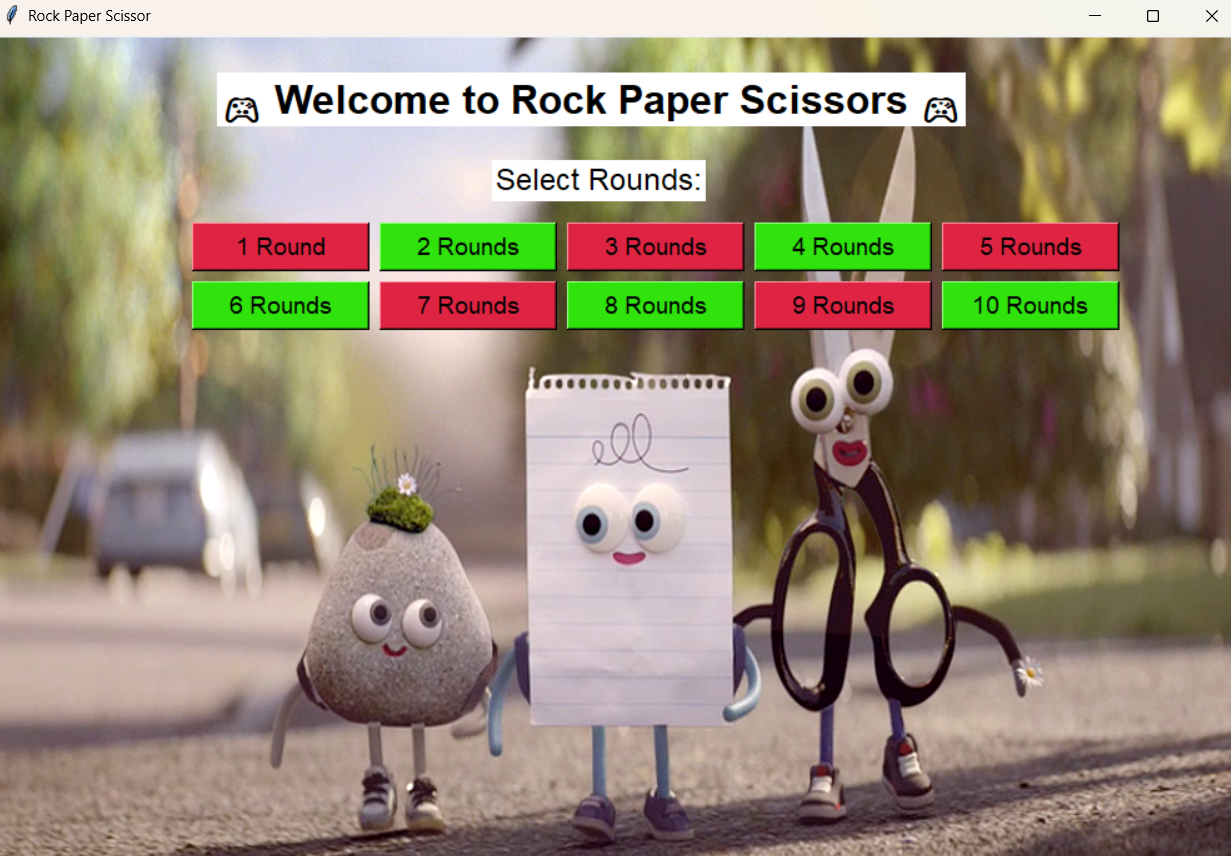

### **game frame**
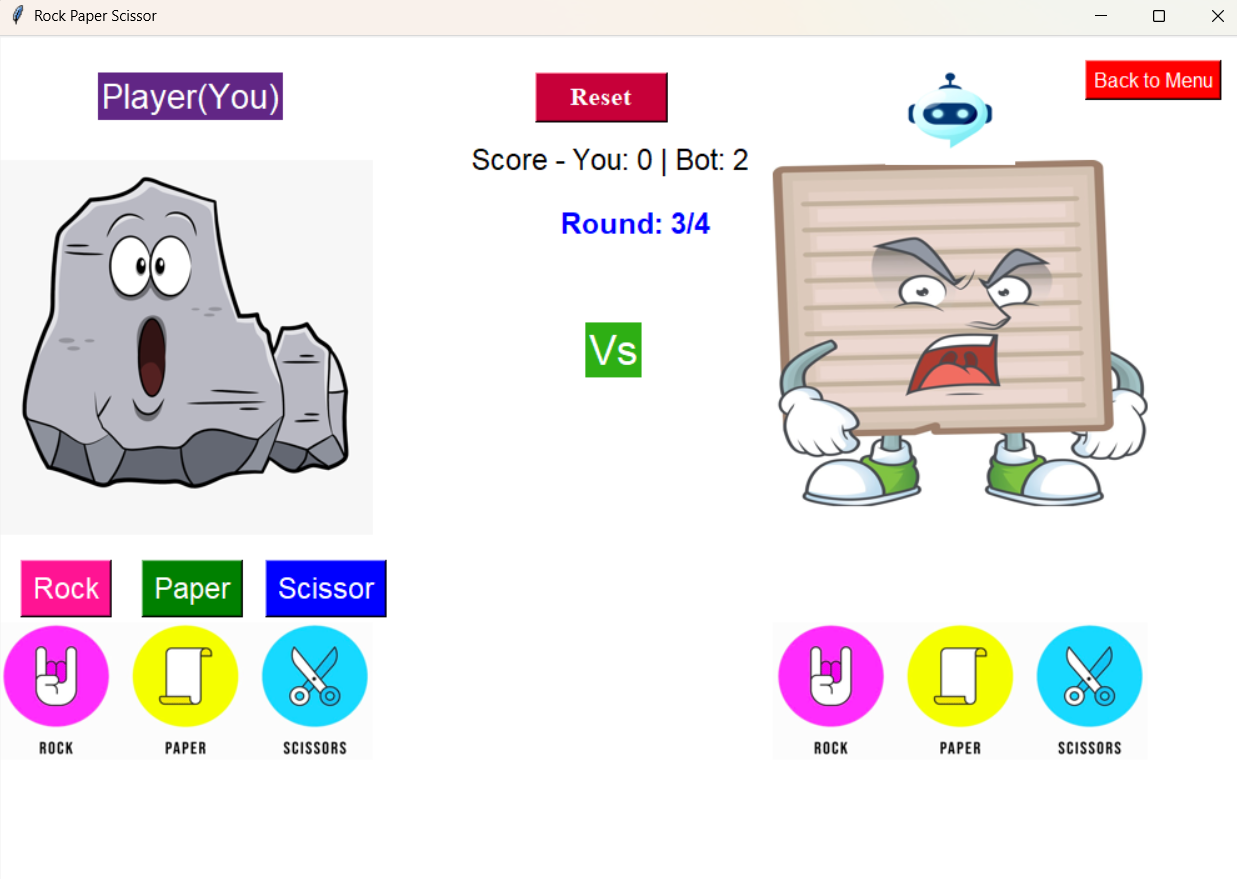

## --------------------**THE END**---------------------------